# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.



### The Imports

Already filled out for you.

In [ ]:
pip install pandas_datareader

In [ ]:
import pandas as pd
from pandas_datareader import data, wb

import numpy as np
import datetime
%matplotlib inline

## Data






Concatenate all the bank dataframes together to a single data frame called bank_stocks by reading the all_banks file. Set the keys argument equal to the tickers list.

In [ ]:
bank_stocks = pd.read_pickle('all_banks.pkl')

Check the head of the bank_stocks dataframe.

In [ ]:
bank_stocks.head()
bank_stocks.columns

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [16]:
tickers = sorted(bank_stocks.columns.levels[0].tolist())
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Set the column name levels:**

In [ ]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
max_close = bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()
max_close

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = pd.DataFrame()

# Calculate returns for each bank stock ticker
for ticker in tickers:
    # Accessing 'Close' prices directly
    close_prices = bank_stocks[ticker]['Close']
    # Calculate the returns
    returns[ticker] = close_prices.pct_change()

# Check the head of the returns dataframe
print(returns.head())

                 BAC         C        GS       JPM        MS       WFC
Date                                                                  
2006-01-03       NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04 -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05  0.001288  0.004961 -0.000393  0.003029  0.002742 -0.000951
2006-01-06 -0.001501  0.000000  0.014169  0.007046  0.001025  0.005714
2006-01-09  0.000644 -0.004731  0.012030  0.016242  0.010586  0.000000


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

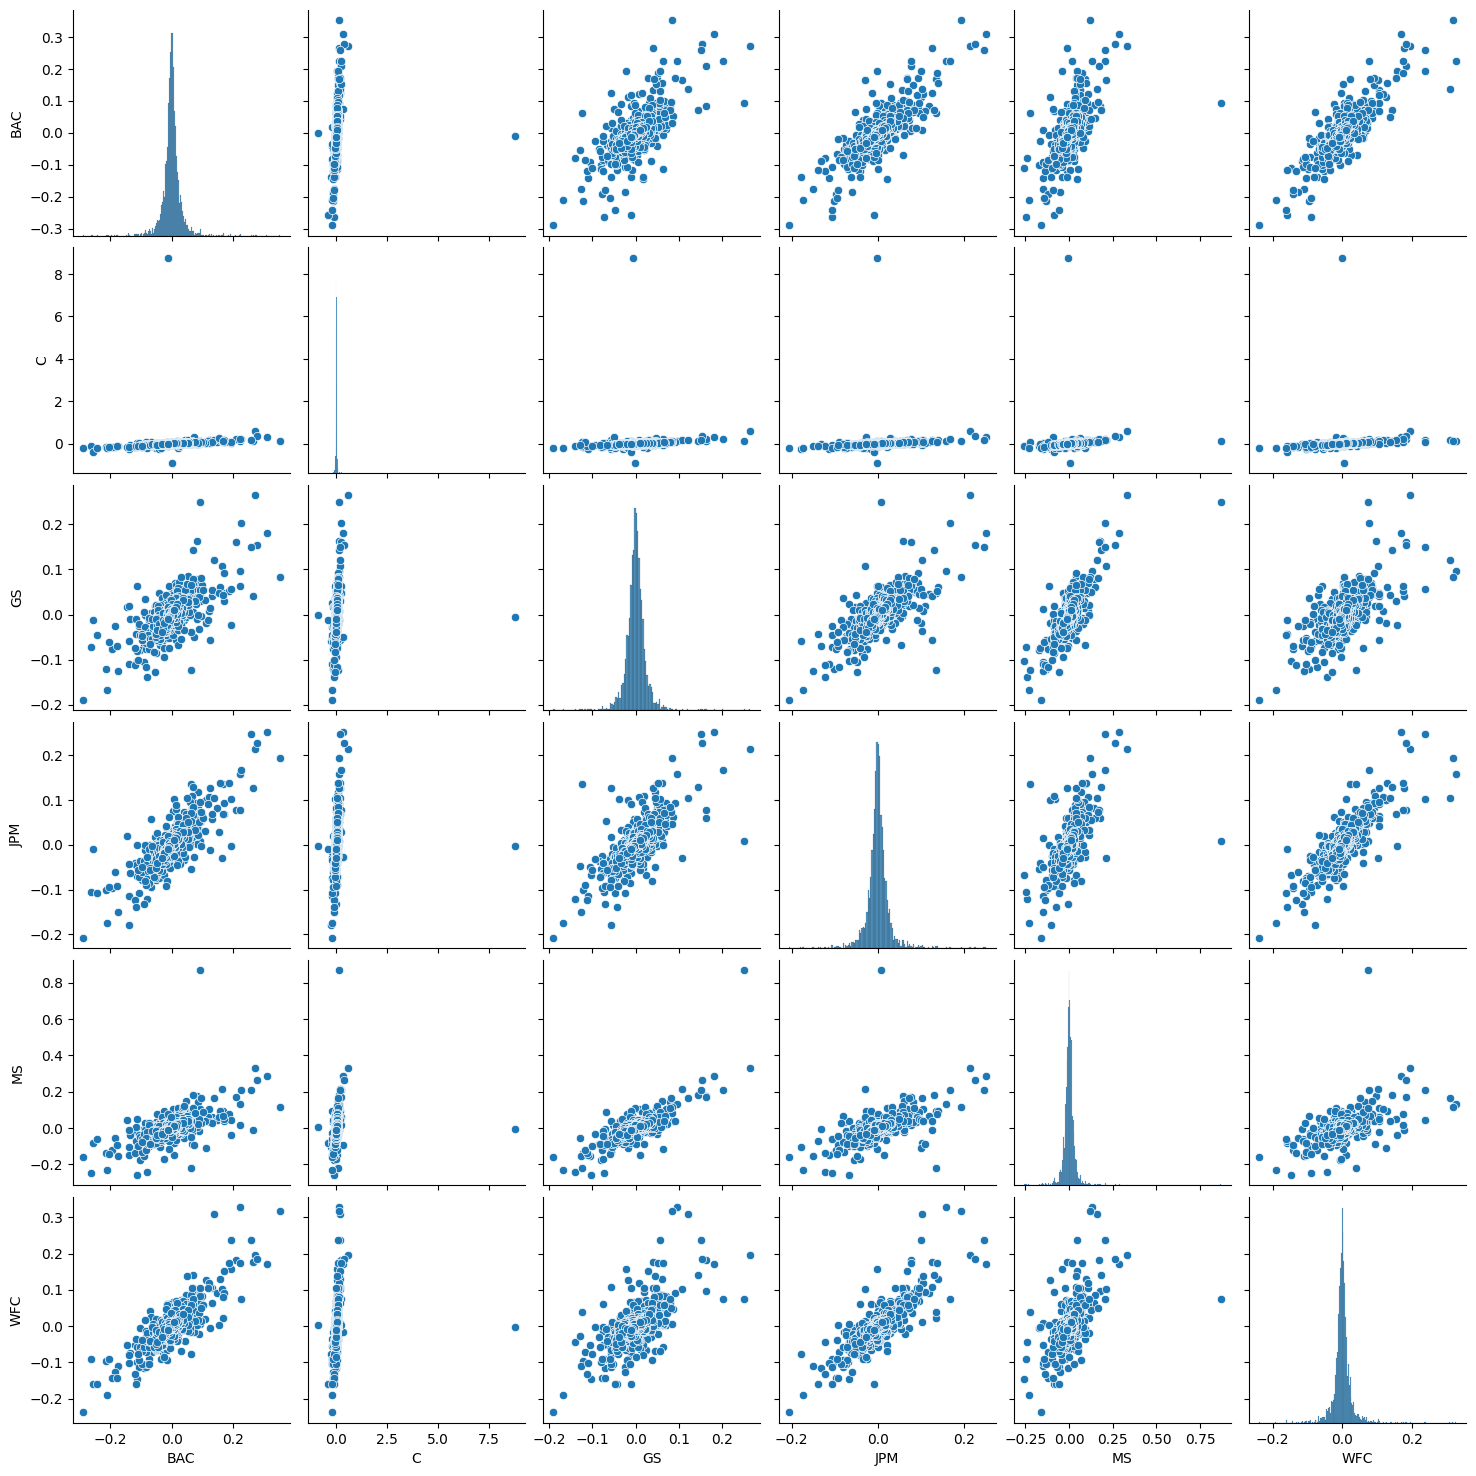

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(returns)
plt.show()

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [25]:
best_returns = returns.idxmax()
worst_returns = returns.idxmin()
print(worst_returns)
print("--------")
print(best_returns)

BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]
--------
BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]


# On Jan 20, 2009 Barack Obama was inaugurated as the President of the US.

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

# Citigroup Reverse Stock Split was not positively received by the market.

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [28]:
td_dev = returns.std()
print("Standard deviation of returns:\n", td_dev)

Standard deviation of returns:
 BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64


# Citigroup with the highest standard deviation is the most riskiest stock ever.

In [29]:
# For the year 2015
returns_2015 = returns.loc['2015-01-01':'2015-12-31']
std_dev_2015 = returns_2015.std()
print("\nStandard deviation of returns in 2015:\n", std_dev_2015)


Standard deviation of returns in 2015:
 BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64


# Morgan Stanley(MS) with the highest standard deviation is the riskiest stock of 2015

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<ipython-input-30-93eefdd87cc0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns_2015['MS'], kde=True)


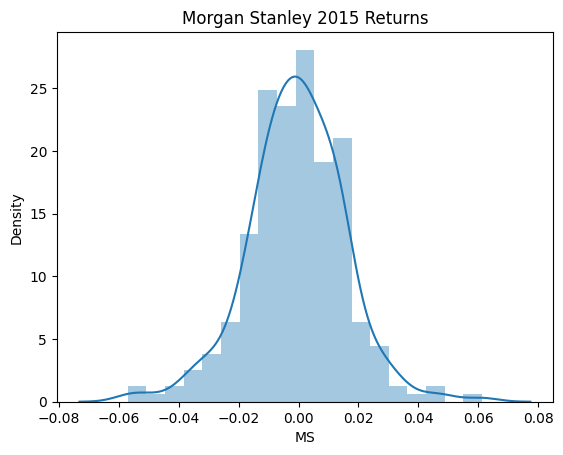

In [30]:
sns.distplot(returns_2015['MS'], kde=True)
plt.title('Morgan Stanley 2015 Returns')
plt.show()

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<ipython-input-31-2e483bce1bc0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns_2008['C'], kde=True)


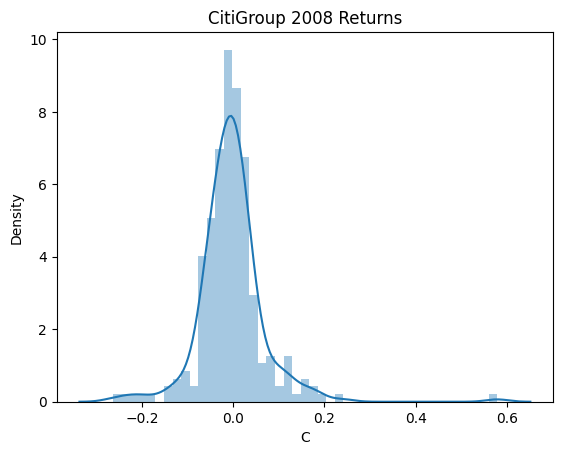

In [31]:
returns_2008 = returns.loc['2008-01-01':'2008-12-31']
std_dev_2008 = returns_2008.std()
sns.distplot(returns_2008['C'], kde=True)
plt.title('CitiGroup 2008 Returns')
plt.show()

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

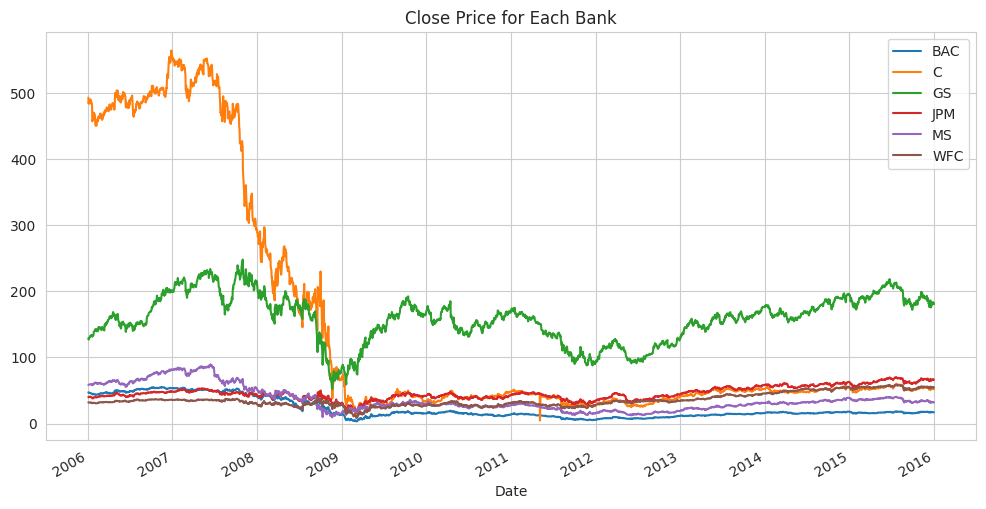

In [33]:
for ticker in tickers:
    bank_stocks[ticker]['Close'].plot(label=ticker, figsize=(12, 6))
plt.legend()
plt.title('Close Price for Each Bank')
plt.show()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008.

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

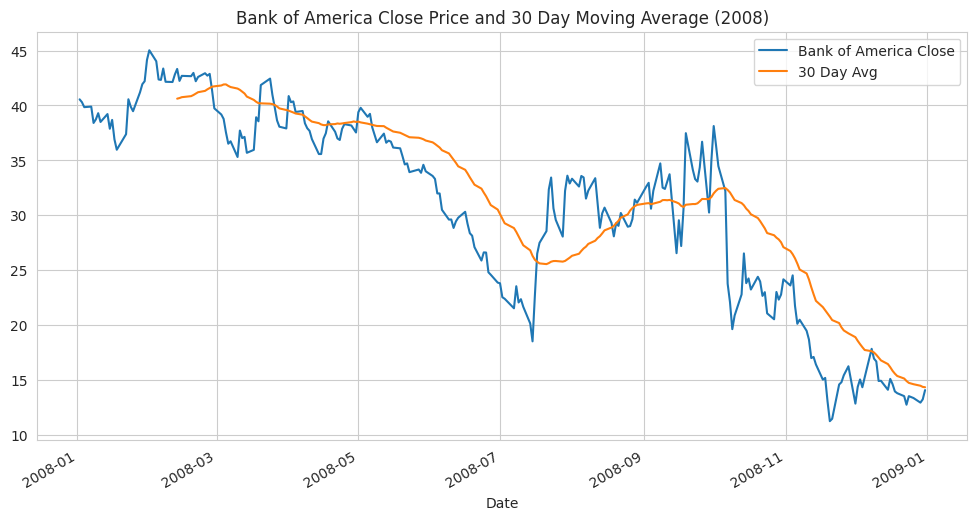

In [34]:
boa_2008 = bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31']
boa_2008_rolling = boa_2008.rolling(window=30).mean()

plt.figure(figsize=(12, 6))
boa_2008.plot(label='Bank of America Close')
boa_2008_rolling.plot(label='30 Day Avg')
plt.legend()
plt.title('Bank of America Close Price and 30 Day Moving Average (2008)')
plt.show()

** Create a heatmap of the correlation between the stocks Close Price.**

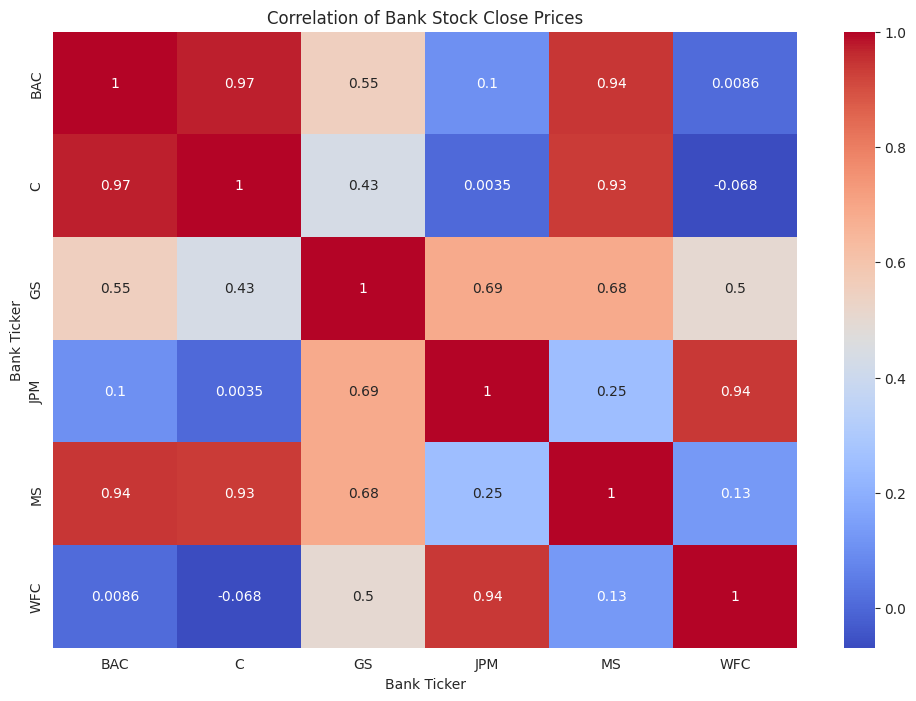

In [35]:
close_prices = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
corr = close_prices.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Bank Stock Close Prices')
plt.show()

** Optional: Use seaborn's clustermap to cluster the correlations together:**

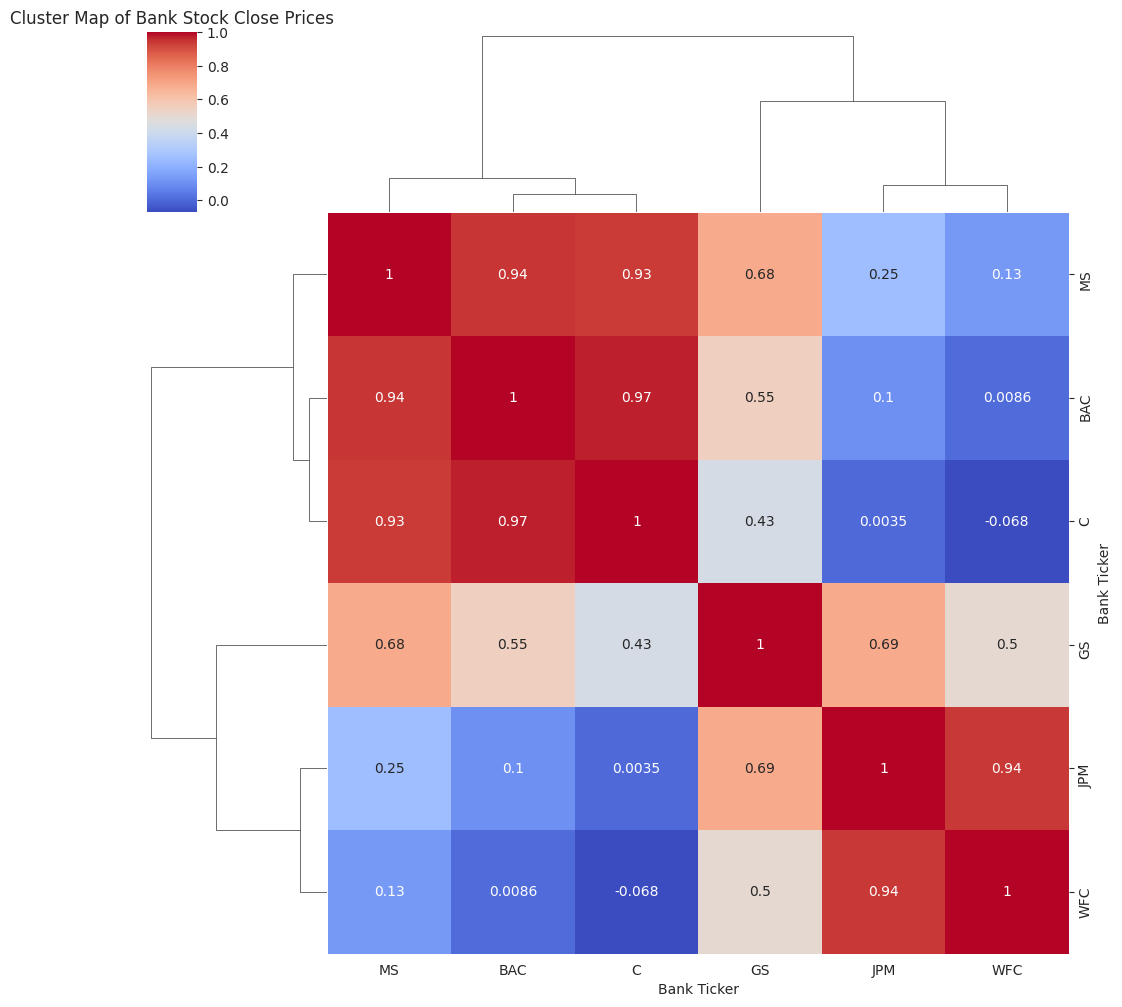

In [36]:
sns.clustermap(corr, annot=True, cmap='coolwarm')
plt.title('Cluster Map of Bank Stock Close Prices')
plt.show()